In [10]:
%run dog_breed_cnn.py
# STEP 0 - Import datasets

# Load train, test and validation datasets
train_files, train_targets = load_dataset('Data/dogImages/train')
valid_files, valid_targets = load_dataset('Data/dogImages/valid')
test_files, test_targets = load_dataset('Data/dogImages/test')

# Load list of dogs names
dog_names = [item[20:-1] for item in sorted(glob('Data/dogImages/train/*/'))]

# Print statistics about the dataset
print(f'There are {len(dog_names)} dog categories.')
print(f'There are {len(np.hstack([train_files, valid_files, test_files]))} total dog images.')
print(f'There are {len(train_files)} training dog images.')
print(f'There are {len(valid_files)} validation dog images.')
print(f'There are {len(test_files)} test dog images.')

# Import human datasets
random.seed(8675309)

# Load filenames in shuffled human dataset
human_files = np.array(glob('Data/lfw/*/*'))
random.shuffle(human_files)

# Print statistics about the human dataset
print(f'There are {len(human_files)} total human images.')

There are 133 dog categories.
There are 8351 total dog images.
There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.
There are 13233 total human images.


Number of faces detected: 1


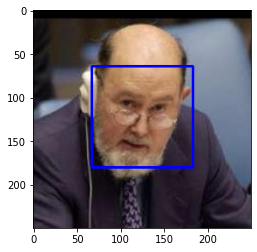

In [3]:

# STEP 1 - Detect humans
# Extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# Load color (BGR) image
img = cv2.imread(human_files[3])
# Convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find faces in the image
faces = face_cascade.detectMultiScale(gray)

# Print number of faces detected in the image
print(f'Number of faces detected: {len(faces)}')

# Get bounding box for each detected face
for (x,y,w,h) in faces:
    # Add bounding box to color image
    cv2.rectangle(img,(x,y), (x+w,y+h), (255,0,0), 2)

# Convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image, along with the bounding box
plt.imshow(cv_rgb)
plt.show()

In [4]:

# ASSESSING THE HUMAN FACE DETECTOR
human_files_short = human_files[:100]
dog_files_short = train_files[:100]

# TODO: Test the performance of the face_detector algorithm on the images in human_files_short and dog_files_short.
accuracy_dog = 100-np.array(list(map(face_detector, dog_files_short))).sum()
accuracy_human = np.array(list(map(face_detector, human_files_short))).sum()

print(f'Accuracy on Dogs files: {accuracy_dog}% - Accuracy on Human files: {accuracy_human}%.')

Accuracy on Dogs files: 88% - Accuracy on Human files: 99%.


In [5]:

# Define RESNET50 Model
ResNet50_mod = ResNet50(weights='imagenet')

In [6]:

# Testing performance of dog_detector function on human_files_short and dog_files_short
accuracy_dog = (np.array(list(map(dog_detector, dog_files_short)))).mean()
accuracy_human = (1-(np.array(list(map(dog_detector, human_files_short))))).mean()

print(f"Accuracy on dog files: {accuracy_dog*100}%\nAccuracy on Human files: {accuracy_human*100}%")

Accuracy on dog files: 100.0%
Accuracy on Human files: 100.0%


In [3]:
%run dog_breed_cnn.py
# STEP 5: CNN to Classify Dog Breeds (USING TRANSFER LEARNING)
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_ResNet50 = bottleneck_features['train']
valid_ResNet50 = bottleneck_features['valid']
test_ResNet50 = bottleneck_features['test']

Using TensorFlow backend.


In [4]:
%run dog_breed_cnn.py

# Create Model arcuitecture
ResNet50_model = Sequential()
ResNet50_model.add(GlobalAveragePooling2D(input_shape=train_ResNet50.shape[1:]))
ResNet50_model.add(Dense(133, activation='softmax'))

ResNet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [6]:
%run dog_breed_cnn.py

# Compile the model
ResNet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [12]:
%run dog_breed_cnn.py
# Train the model
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.ResNet50.hdf5', verbose=1, save_best_only=True)

ResNet50_model.fit(train_ResNet50, train_targets, validation_data=(valid_ResNet50, valid_targets), epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 360us/step - loss: 2.1893 - accuracy: 0.6037 - val_loss: 2.6039 - val_accuracy: 0.5665

Epoch 00001: val_loss improved from inf to 2.60395, saving model to saved_models/weights.best.ResNet50.hdf5
Epoch 2/20
6680/6680 [==============================] - 2s 351us/step - loss: 1.2620 - accuracy: 0.7412 - val_loss: 2.2353 - val_accuracy: 0.6263

Epoch 00002: val_loss improved from 2.60395 to 2.23529, saving model to saved_models/weights.best.ResNet50.hdf5
Epoch 3/20
6680/6680 [==============================] - 3s 383us/step - loss: 0.8164 - accuracy: 0.8115 - val_loss: 2.0612 - val_accuracy: 0.6587

Epoch 00003: val_loss improved from 2.23529 to 2.06124, saving model to saved_models/weights.best.ResNet50.hdf5
Epoch 4/20
6680/6680 [==============================] - 2s 354us/step - loss: 0.5533 - accuracy: 0.8632 - val_loss: 1.9672 - val_accuracy: 0.6719

Epoch 00004: val_loss improved fr